In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from intersect import intersection

In [2]:
def trend_line(x, y, degree=1, extrapolate_range=None):
  coeffs = np.polyfit(x, y, degree)
  poly = np.poly1d(coeffs)

  # Trend tylko dla oryginalnych danych
  y_trend = poly(x)

  # Ekstrapolacja, jeśli podano zakres (min_x, max_x, num_points)
  if extrapolate_range is not None:
    min_x, max_x, num_points = extrapolate_range
    x_extrap = np.linspace(min_x, max_x, num_points)
    y_extrap = poly(x_extrap)
    return coeffs, y_trend, x_extrap, y_extrap

  return coeffs, y_trend

In [ ]:
frame = pd.read_csv("../data/mechanika_102/rewersyjne.csv", delimiter=",")
frame_a = frame[frame["axis"] == "A"]
frame_b = frame[frame["axis"] == "B"]

In [4]:
length_a = frame_a['length'].to_list()
time_a = frame_a['time'].to_list()

length_b = frame_b['length'].to_list()
time_b = frame_b['time'].to_list()

In [5]:
coeffs_a, y_trend_a = trend_line(length_a, time_a, degree=2)
coeffs_a, y_trend_a, x_extra_a, y_extra_a = trend_line(length_a, time_a, degree=2, extrapolate_range=(0.3, length_a[0], 2))

coeffs_b, y_trend_b, x_extra_b, y_extra_b = trend_line(length_b, time_b, degree=2, extrapolate_range=(0.3, length_b[0], 2))
coeffs_b, y_trend_b, x_extra_b1, y_extra_b1 = trend_line(length_b, time_b, degree=2, extrapolate_range=(length_b[-1], length_a[-1], 2))

In [6]:
x_a = np.concatenate((x_extra_a, length_a))
y_a = np.concatenate((y_extra_a, y_trend_a))

x_b = np.concatenate((x_extra_b, length_b, x_extra_b1))
y_b = np.concatenate((y_extra_b, y_trend_b, y_extra_b1))

intersect = intersection(x_a, y_a, x_b, y_b)

print(f"x1: {intersect[0][0]} y1: {intersect[1][0]}")
print(f"x2: {intersect[0][1]} y2: {intersect[1][1]}")

x1: 0.35708107088311186 y1: 18.597556729944774
x2: 0.9046959170706431 y2: 18.63782013005871


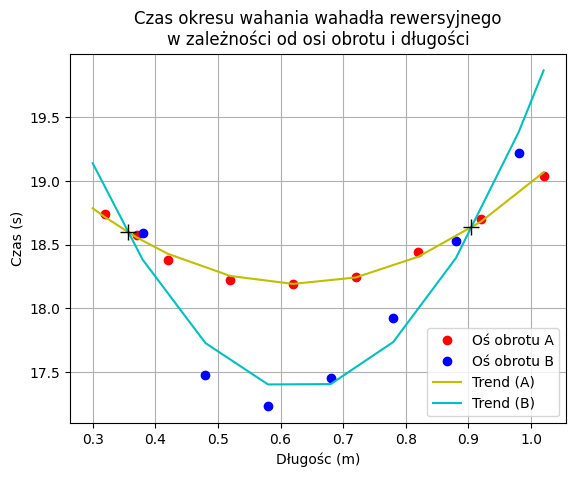

In [7]:
plt.plot(length_a, time_a, 'ro')
plt.plot(length_b, time_b, 'bo')
plt.plot(x_a, y_a, 'y-')
plt.plot(x_b, y_b, 'c-')
plt.plot(intersect[0][0], intersect[1][0], 'k+', markersize=12)
plt.plot(intersect[0][1], intersect[1][1], 'k+', markersize=12)
plt.xlabel("Długośc (m)")
plt.ylabel("Czas (s)")
plt.legend(["Oś obrotu A", "Oś obrotu B", "Trend (A)", "Trend (B)"], loc='lower right')
plt.title("Czas okresu wahania wahadła rewersyjnego\nw zależności od osi obrotu i długości")
plt.grid()
plt.show()